# About the project:

At the present, antibiotic-resistant bacteria have spread widely around the world and are currently responsible for increasing morbidity and mortality rates.
Thus, in the coming decades, it may be necessary to develop new drugs that will be effective against such mutant bacteria.
A possible solution is development and synthesis of peptides with
antibacterial properties.The potential therapeutic applications of AMPs are significant because
they have broad-spectrum antibacterial activity.

The aim of this project is to develop a model capable of predicting the activity of antimicrobial peptides against methicillin-resistant Staphylococcus aureus (MRSA).
In the future, the model will be improved: it will be possible to predict the activity of peptides against a variety of bacteria, not just Staphylococcus aureus and MRSA.


Data taken from the Antimicrobial Peptide Data Repository (DRAMP, http://dram.cpu-bioinfor.org/). In addition, the data were supplemented with MRSA peptides from the articles. Descriptors for peptides have been previously calculated.

# Data preprocessing

In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn. model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\PEPT.csv')

In [3]:
df

Sequence  Sequence_Length  \
0                                        LNLKALLAVAKKIA               14   
1                     GFWGGLGYIAGRVGAAYGHAQASANNHHSPING               33   
2                                        WRWRCRRRFCRWRW               14   
3                           GIGGALLSAGKSALKGLAKGLAEHFAN               27   
4                                            FFFLSRIFGK               10   
...                                                 ...              ...   
2921                                             TVYTQA                6   
2922                                     INWLKLGKKMMSAI               14   
2923  YRGGYTGPIPRPPPIGRPPLRLVVCACYRLSVSDARNCCIKFGSCC...               50   
2924                                      GLFDKLKSLVSDF               13   
2925                                GTPGFQTPDARVISRFGFN               19   

                                                   Name  \
0                                   Mastoparan-C [L14A]   
1     Lactocin 705beta (lac705beta; chain b of Lacto...   
2                               WR2 (Derived from PG-1)   
3     Maximin-11 (Maximin-6; toads, amphibians, anim...   
4             Temporin-SHf (Frogs, amphibians, animals)   
...                                                 ...   
2921                        Fusaricidin D (Bacteriocin)   
2922                                   MP-5 (MP analog)   
2923  Penaeidin-1 (Pen-1; shrimps, Arthropods, animals)   
2924                           Antibacterial peptide A2   
2925                           Capistruin (Bacteriocin)   

                                               Activity  \
0     Antimicrobial, Antibacterial,Anti-Gram+, Anti-...   
1                          Antimicrobial, Antibacterial   
2     Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
3              Antimicrobial, Antibacterial, Antifungal   
4     Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
...                                                 ...   
2921  Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
2922  Antimicrobial, Antibacterial, Anti-Gram+, Anti...   
2923  Antimicrobial, Antibacterial, Antifungal, Anti...   
2924           Antimicrobial, Antibacterial, Anti-Gram-   
2925                       Antimicrobial, Antibacterial   

                                        Target_Organism  \
0     [Ref.33285267]Gram-positive bacteria:Staphyloc...   
1     Several lactic acid bacteria, Listeria, Strept...   
2     [Ref.24621994] Gram-positive bacteria : Staphy...   
3                              Yeast: Candida albicans.   
4     Gram-positive bacterium: Staphylococcus aureus...   
...                                                 ...   
2921                                      Gram-positive   
2922  Gram-negative bacterium: Escherichia coli (MIC...   
2923  Gram-positive bacterium: Micrococcus luteus;##...   
2924  Gram-negative bacterium: Escherichia coli (MIC...   
2925               Burkholderia and Pseudomonas strains   

     Linear/Cyclic/Branched  Methicillin-Resistant Staphylococcus aureus  \
0                    Linear                                          0.0   
1          Not included yet                                          0.0   
2                    Linear                                          0.0   
3          Not included yet                                          0.0   
4                    Linear                                          0.0   
...                     ...                                          ...   
2921       Not included yet                                          0.0   
2922       Not included yet                                          0.0   
2923       Not included yet                                          0.0   
2924       Not included yet                                          0.0   
2925       Not included yet                                          0.0   

       exactmw       amw  lipinskiHBA  ...     VHSE4     VHSE5     VHSE6  \
0     0.032742  0.

In [5]:
#Displaying the column names
str(df.columns.values.tolist())

"['Sequence', 'Sequence_Length', 'Name', 'Activity', 'Target_Organism', 'Linear/Cyclic/Branched', 'Methicillin-Resistant Staphylococcus aureus', 'exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms', 'NumBridgeheadAtoms', 'NumAtomStereoCenters', 'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n', 'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2', 'kappa3', 'Phi', 'MRSA', 'Antibacterial', 'Antifungal', 'Anti-Gram+', 'Anti-Gram-', 'Antimicrobial', 'Antiviral', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP

In [4]:
df.dtypes

Sequence            object
Sequence_Length      int64
Name                object
Activity            object
Target_Organism     object
                    ...   
Z1                 float64
Z2                 float64
Z3                 float64
Z4                 float64
Z5                 float64
Length: 145, dtype: object

In [7]:
#Detecting and filling in missing values:
df.isna().sum(axis = 0)

Sequence           0
Sequence_Length    0
Name               0
Activity           0
Target_Organism    0
                  ..
Z1                 0
Z2                 0
Z3                 0
Z4                 0
Z5                 0
Length: 145, dtype: int64

In [3]:
#Remove duplicate data:
df=df.drop_duplicates(subset=['Sequence'])
#Remove strings that have gaps:
df=df.dropna()

# Data analysis

In [7]:
#Let's consider the main characteristics of descriptors in data.
df.describe()

Sequence_Length  Methicillin-Resistant Staphylococcus aureus  \
count      2926.000000                                  2926.000000   
mean         25.323650                                     0.087491   
std          14.822142                                     0.282602   
min           2.000000                                     0.000000   
25%          15.000000                                     0.000000   
50%          21.000000                                     0.000000   
75%          32.000000                                     0.000000   
max          95.000000                                     1.000000   

           exactmw          amw  lipinskiHBA  lipinskiHBD  NumRotatableBonds  \
count  2926.000000  2926.000000  2926.000000  2926.000000        2926.000000   
mean      0.128272     0.215916     0.198665     0.045172           0.145713   
std       0.140906     0.045791     0.182429     0.049285           0.163159   
min      -0.023009     0.154806     0.015821    -0.023681          -0.029280   
25%       0.039632     0.195096     0.091924     0.018173           0.049421   
50%       0.087585     0.207766     0.147212     0.035671           0.102160   
75%       0.174704     0.219124     0.252545     0.052534           0.205304   
max       1.126936     0.649821     1.593858     0.399134           1.423540   

            NumHBD       NumHBA  NumHeavyAtoms  ...        VHSE4        VHSE5  \
count  2926.000000  2926.000000    2926.000000  ...  2926.000000  2926.000000   
mean      0.128334    -0.116399       0.180059  ...     0.005731     0.313793   
std       0.037652     0.130291       0.144746  ...     0.318041     0.328134   
min       0.082182    -1.200894       0.017786  ...    -1.116667    -2.680000   
25%       0.111753    -0.135883       0.097765  ...    -0.209875     0.083712   
50%       0.120339    -0.084065       0.144474  ...    -0.000569     0.256753   
75%       0.132548    -0.048790       0.212456  ...     0.196719     0.533571   
max       0.589021     0.027708       1.191944  ...     1.633947     1.550000   

             VHSE6        VHSE7        VHSE8           Z1           Z2  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean     -0.219494     0.303995    -0.093532    -0.194680    -0.445618   
std       0.363791     0.268296     0.291948     0.780297     0.829596   
min      -1.356154    -1.020833    -1.056000    -3.193333    -2.867000   
25%      -0.469495     0.120522    -0.286884    -0.714115    -1.018044   
50%      -0.263804     0.312857    -0.126548    -0.098213    -0.566974   
75%       0.014284     0.491585     0.053390     0.312363    -0.035498   
max       1.470000     1.595357     1.838718     3.980000     3.220000   

                Z3           Z4           Z5  
count  2926.000000  2926.000000  2926.000000  
mean     -0.563915     0.100921     0.125767  
std       0.632305     0.585030     0.353581  
min      -3.500000    -2.460000    -1.245000  
25%      -0.935275    -0.287024    -0.057918  
50%      -0.507887    -0.012417     0.184792  
75%      -0.159044     0.356429     0.345107  
max       1.966667     3.058889     1.071538  

[8 rows x 139 columns]

Previously, columns characterizing the presence of antibacterial, antiviral, antifungal properties were created in the data.
The presence of antibacterial properties in relation to gram-negative, gram-positive bacteria and  to methicillin-resistant Staphylococcus aureus bacteria is highlighted.

<AxesSubplot:xlabel='count', ylabel='type'>

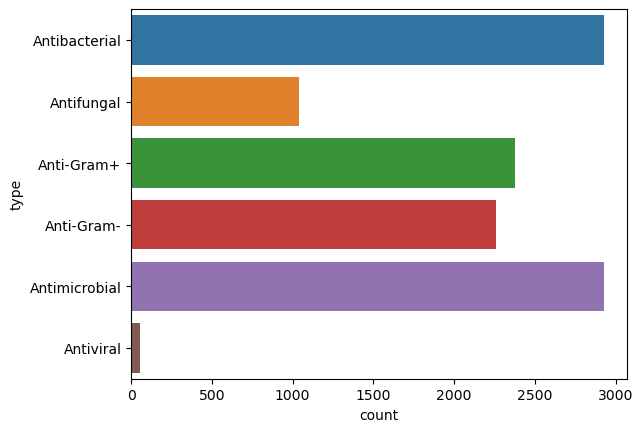

In [5]:
ty=['Antibacterial','Antifungal','Anti-Gram+','Anti-Gram-','Antimicrobial','Antiviral']
df1= pd.DataFrame(columns=['count', 'type'],index=range(0, 6))
i=0
for N in ty:
    df1.at[i,'type']=N
    count=df[N].sum(axis=0)
    df1.at[i,'count']=count
    i=i+1

import seaborn as sns
sns.barplot(x='count', y='type', data=df1)

As can be seen from the graph, many of the peptides in the data have a wide range of applications.
They can be used against several classes of living organisms.

C:\Users\Elina\AppData\Local\Temp\ipykernel_24824\3116716598.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  A=df.groupby(['MRSA'])['Antibacterial', 'Antifungal', 'Anti-Gram+','Anti-Gram-','Antimicrobial','Antiviral']. sum().reset_index()


<AxesSubplot:xlabel='MRSA'>

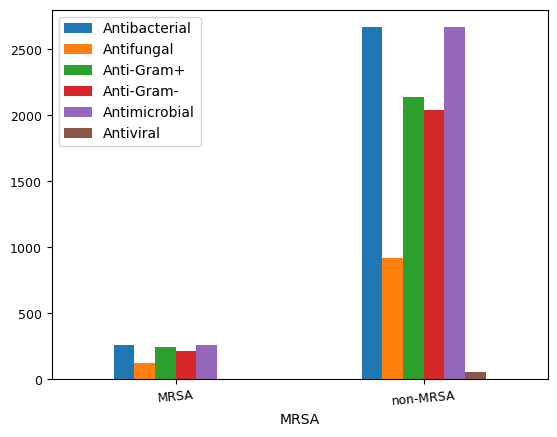

In [6]:
#Consider the distribution of MRSA/non-MRSA properties. 
#It can be seen that these properties occur in conjunction with antibacterial properties against Gram-positive bacteria.
A=df.groupby(['MRSA'])['Antibacterial', 'Antifungal', 'Anti-Gram+','Anti-Gram-','Antimicrobial','Antiviral']. sum().reset_index()
A.plot(x="MRSA", y=['Antibacterial','Antifungal','Anti-Gram+','Anti-Gram-','Antimicrobial','Antiviral'], kind="bar", rot=5, fontsize=9)

In [7]:
A

MRSA  Antibacterial  Antifungal  Anti-Gram+  Anti-Gram-  Antimicrobial  \
0      MRSA            256         124         242         217            256   
1  non-MRSA           2669         916        2137        2043           2669   

   Antiviral  
0          0  
1         54

# Data normalization

In [4]:
df=df.drop(columns = ['Sequence','MRSA','Antimicrobial','Antibacterial', 'Antifungal', 'Anti-Gram+', 'Anti-Gram-', 'Antiviral','Name', 'Activity', 'Target_Organism', 'Linear/Cyclic/Branched'],axis = 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)

In [6]:
df

Sequence_Length  Methicillin-Resistant Staphylococcus aureus   exactmw  \
0            0.129032                                          0.0  0.048482   
1            0.333333                                          0.0  0.155251   
2            0.129032                                          0.0  0.049248   
3            0.268817                                          0.0  0.111234   
4            0.086022                                          0.0  0.032613   
...               ...                                          ...       ...   
2921         0.043011                                          0.0  0.004133   
2922         0.129032                                          0.0  0.049262   
2923         0.516129                                          0.0  0.253617   
2924         0.118280                                          0.0  0.047523   
2925         0.182796                                          0.0  0.094371   

           amw  lipinskiHBA  lipinskiHBD  NumRotatableBonds    NumHBD  \
0     0.089329     0.046806     0.102408           0.051885  0.074814   
1     0.142842     0.151617     0.149415           0.147713  0.120583   
2     0.081528     0.041472     0.103703           0.049912  0.064047   
3     0.131684     0.096434     0.185844           0.113904  0.099125   
4     0.056315     0.029864     0.082304           0.038819  0.053989   
...        ...          ...          ...                ...       ...   
2921  0.027579     0.006291     0.029635           0.031367  0.008925   
2922  0.079772     0.040767     0.092736           0.056107  0.061715   
2923  0.175889     0.225619     0.237298           0.192780  0.111499   
2924  0.070416     0.040167     0.097765           0.059843  0.049413   
2925  0.094516     0.082984     0.131204           0.064389  0.083326   

        NumHBA  NumHeavyAtoms  ...     VHSE4     VHSE5     VHSE6     VHSE7  \
0     0.959301       0.065702  ...  0.211208  0.732354  0.245567  0.580770   
1     0.856872       0.144901  ...  0.535528  0.632495  0.343041  0.599964   
2     0.931081       0.047841  ...  0.699671  0.871665  0.794521  0.404123   
3     0.916210       0.119223  ...  0.473564  0.639436  0.267425  0.663567   
4     0.955009       0.045938  ...  0.431419  0.724823  0.457567  0.348153   
...        ...            ...  ...       ...       ...       ...       ...   
2921  0.998718       0.005114  ...  0.159964  0.662727  0.381963  0.223289   
2922  0.960102       0.057696  ...  0.395323  0.731341  0.357279  0.511968   
2923  0.733815       0.265019  ...  0.422257  0.683972  0.406402  0.424523   
2924  0.954853       0.054227  ...  0.361504  0.599564  0.435493  0.431068   
2925  0.904794       0.116642  ...  0.457250  0.623616  0.414119  0.441700   

         VHSE8        Z1        Z2        Z3        Z4        Z5  
0     0.242165  0.318508  0.300148  0.467247  0.422316  0.887099  
1     0.230284  0.506337  0.315680  0.671508  0.447005  0.666682  
2     0.409959  0.491569  0.844868  0.462805  0.815770  0.122103  
3     0.187340  0.468453  0.226342  0.597425  0.390309  0.746564  
4     0.301929  0.238848  0.520125  0.577317  0.479626  0.496430  
...        ...       ...       ...       ...       ...       ...  
2921  0.326802  0.407063  0.296315  0.512500  0.288403  0.513697  
2922  0.220944  0.327669  0.403882  0.520166  0.512655  0.623159  
2923  0.487370  0.434796  0.376146  0.651439  0.456759  0.550304  
2924  0.310858  0.396912  0.405037  0.607176  0.341624  0.681554  
2925  0.433166  0.471874  0.385489  0.628017  0.383277  0.653084  

[2926 rows x 133 columns]

To consider the dependencies between two descriptors, let's use a pairplot:

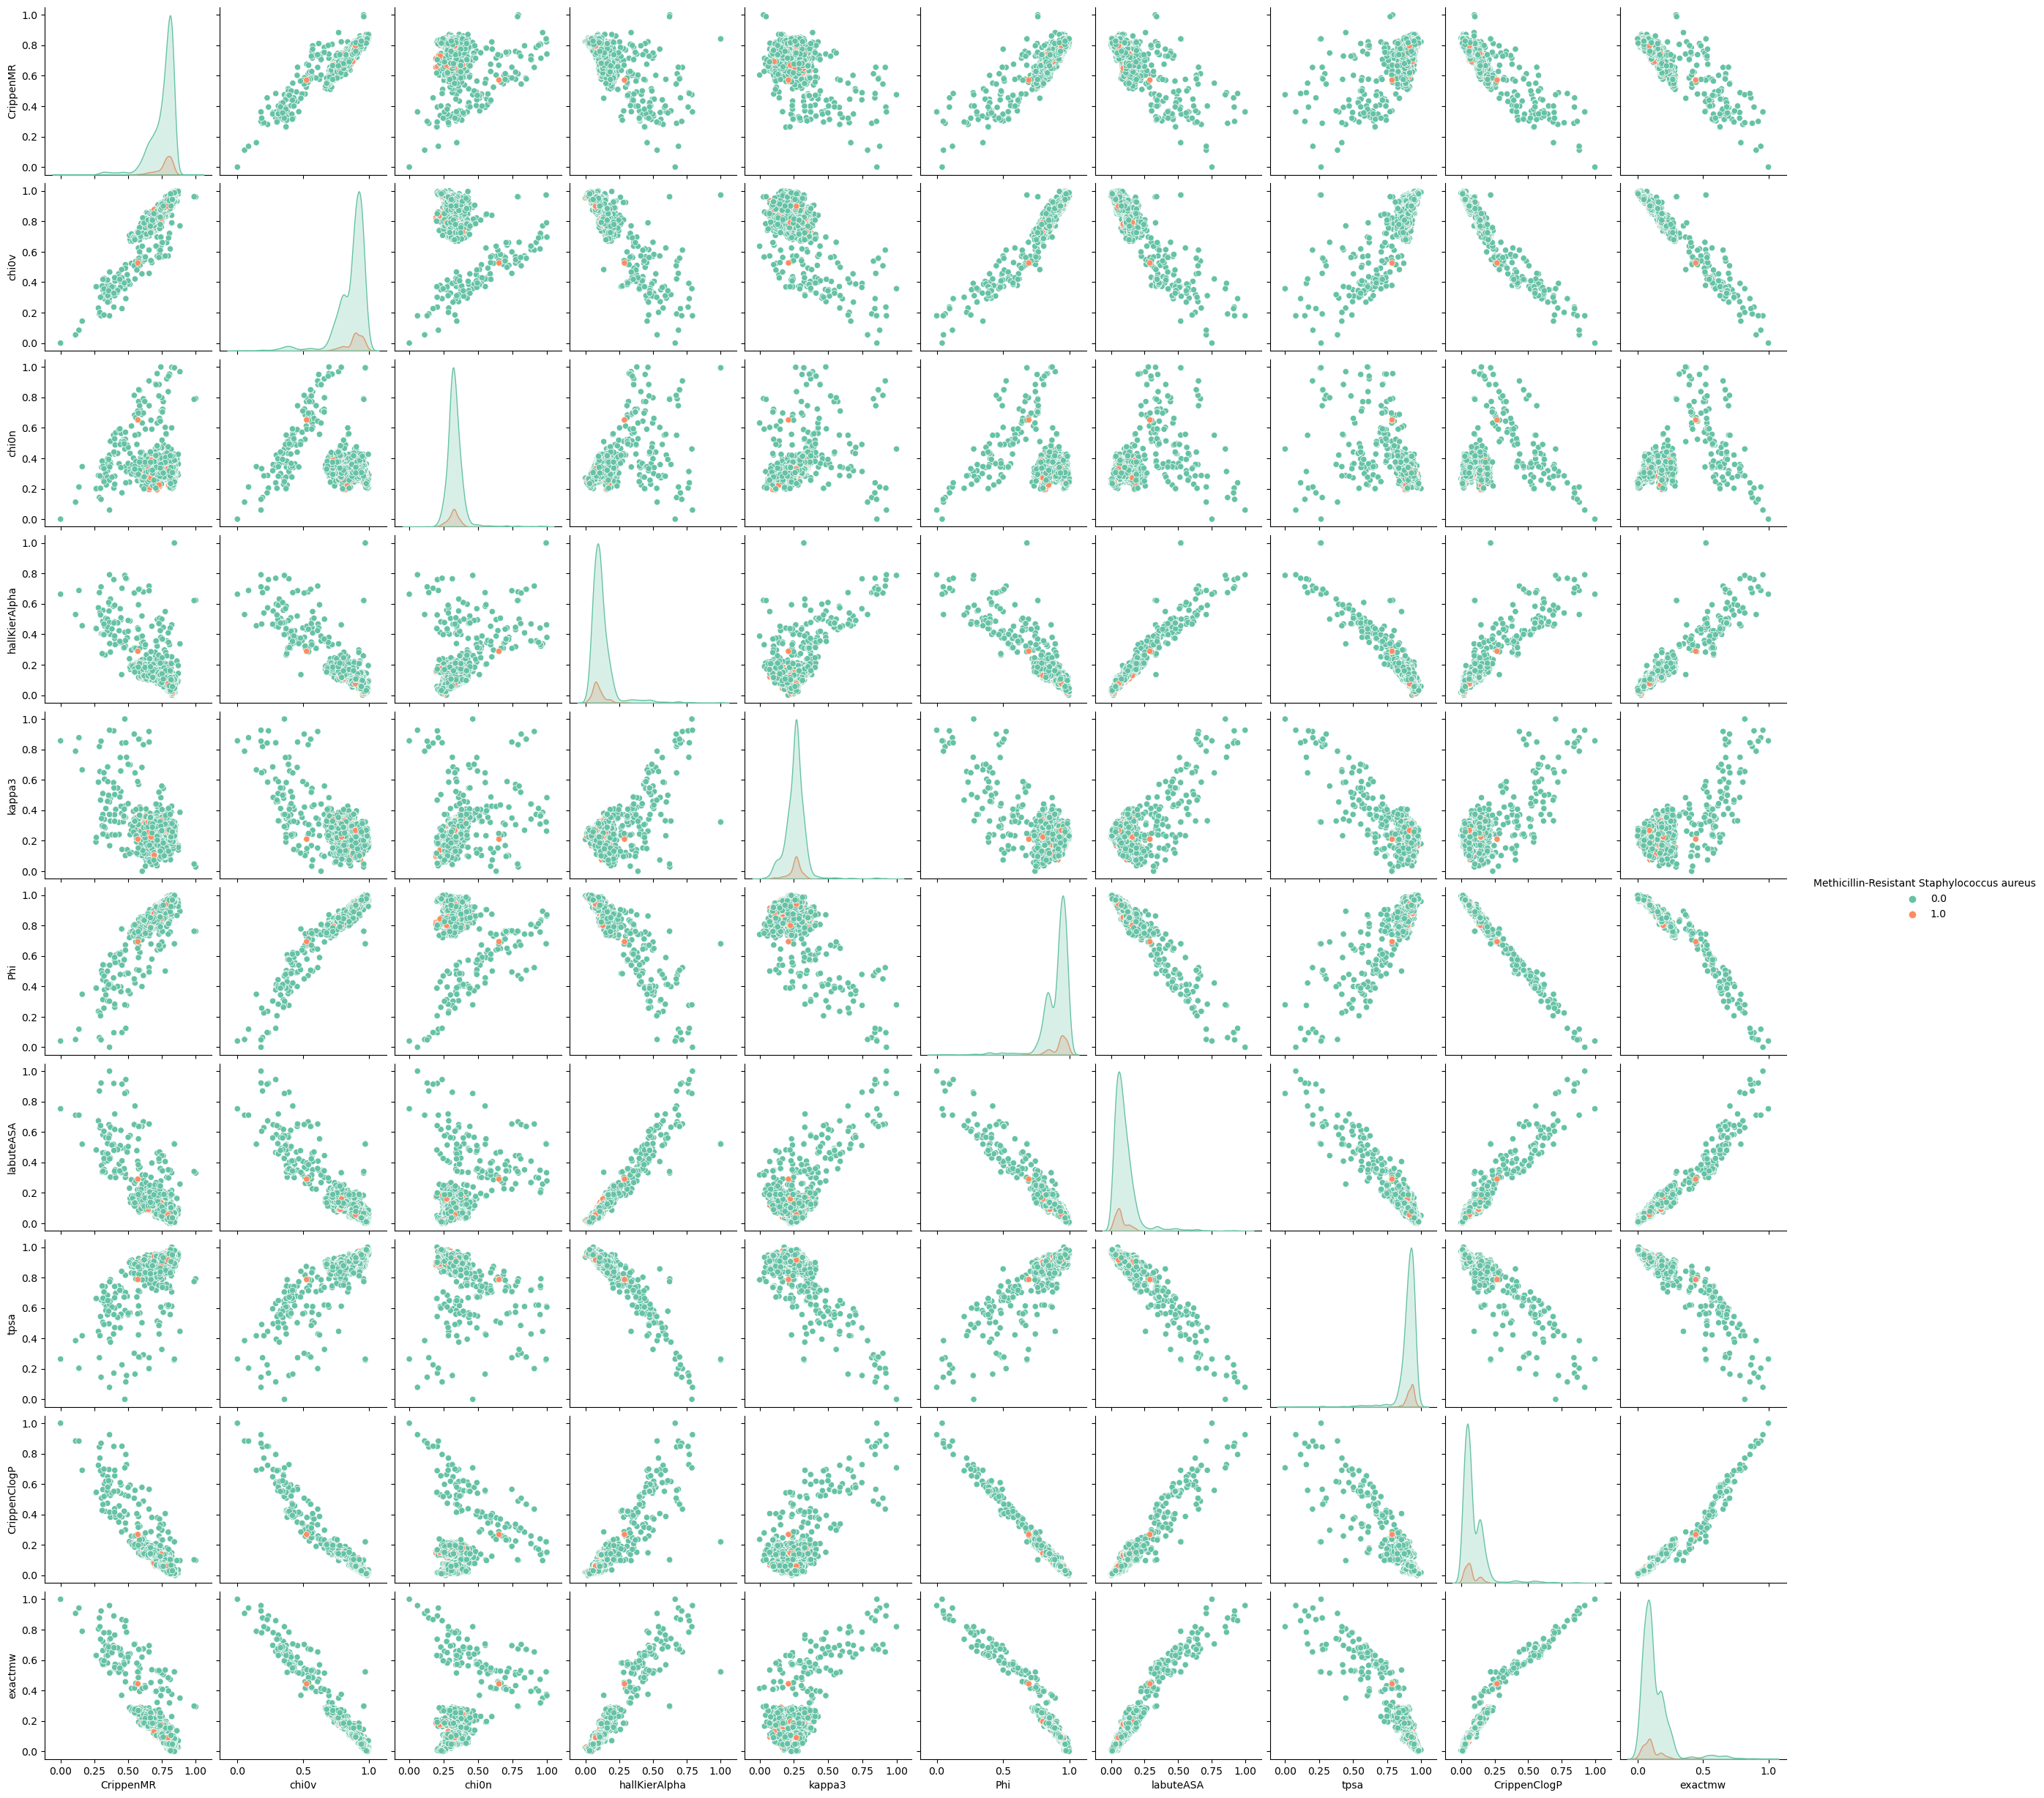

In [11]:
df1=df[['CrippenMR', 'chi0v', 'chi0n', 'hallKierAlpha', 'kappa3', 'Phi','labuteASA', 'tpsa', 'CrippenClogP','Methicillin-Resistant Staphylococcus aureus', 'exactmw']]
pl=sns.pairplot(df1, hue='Methicillin-Resistant Staphylococcus aureus', palette='Set2')
plt.show()

In [11]:
df3=df[['BLOSUM10', 'PP1',  'F6', 'KF5', 'ST8', 'SVGER11', 'T5', 'VHSE8', 'Z1','kappa3','Methicillin-Resistant Staphylococcus aureus']]

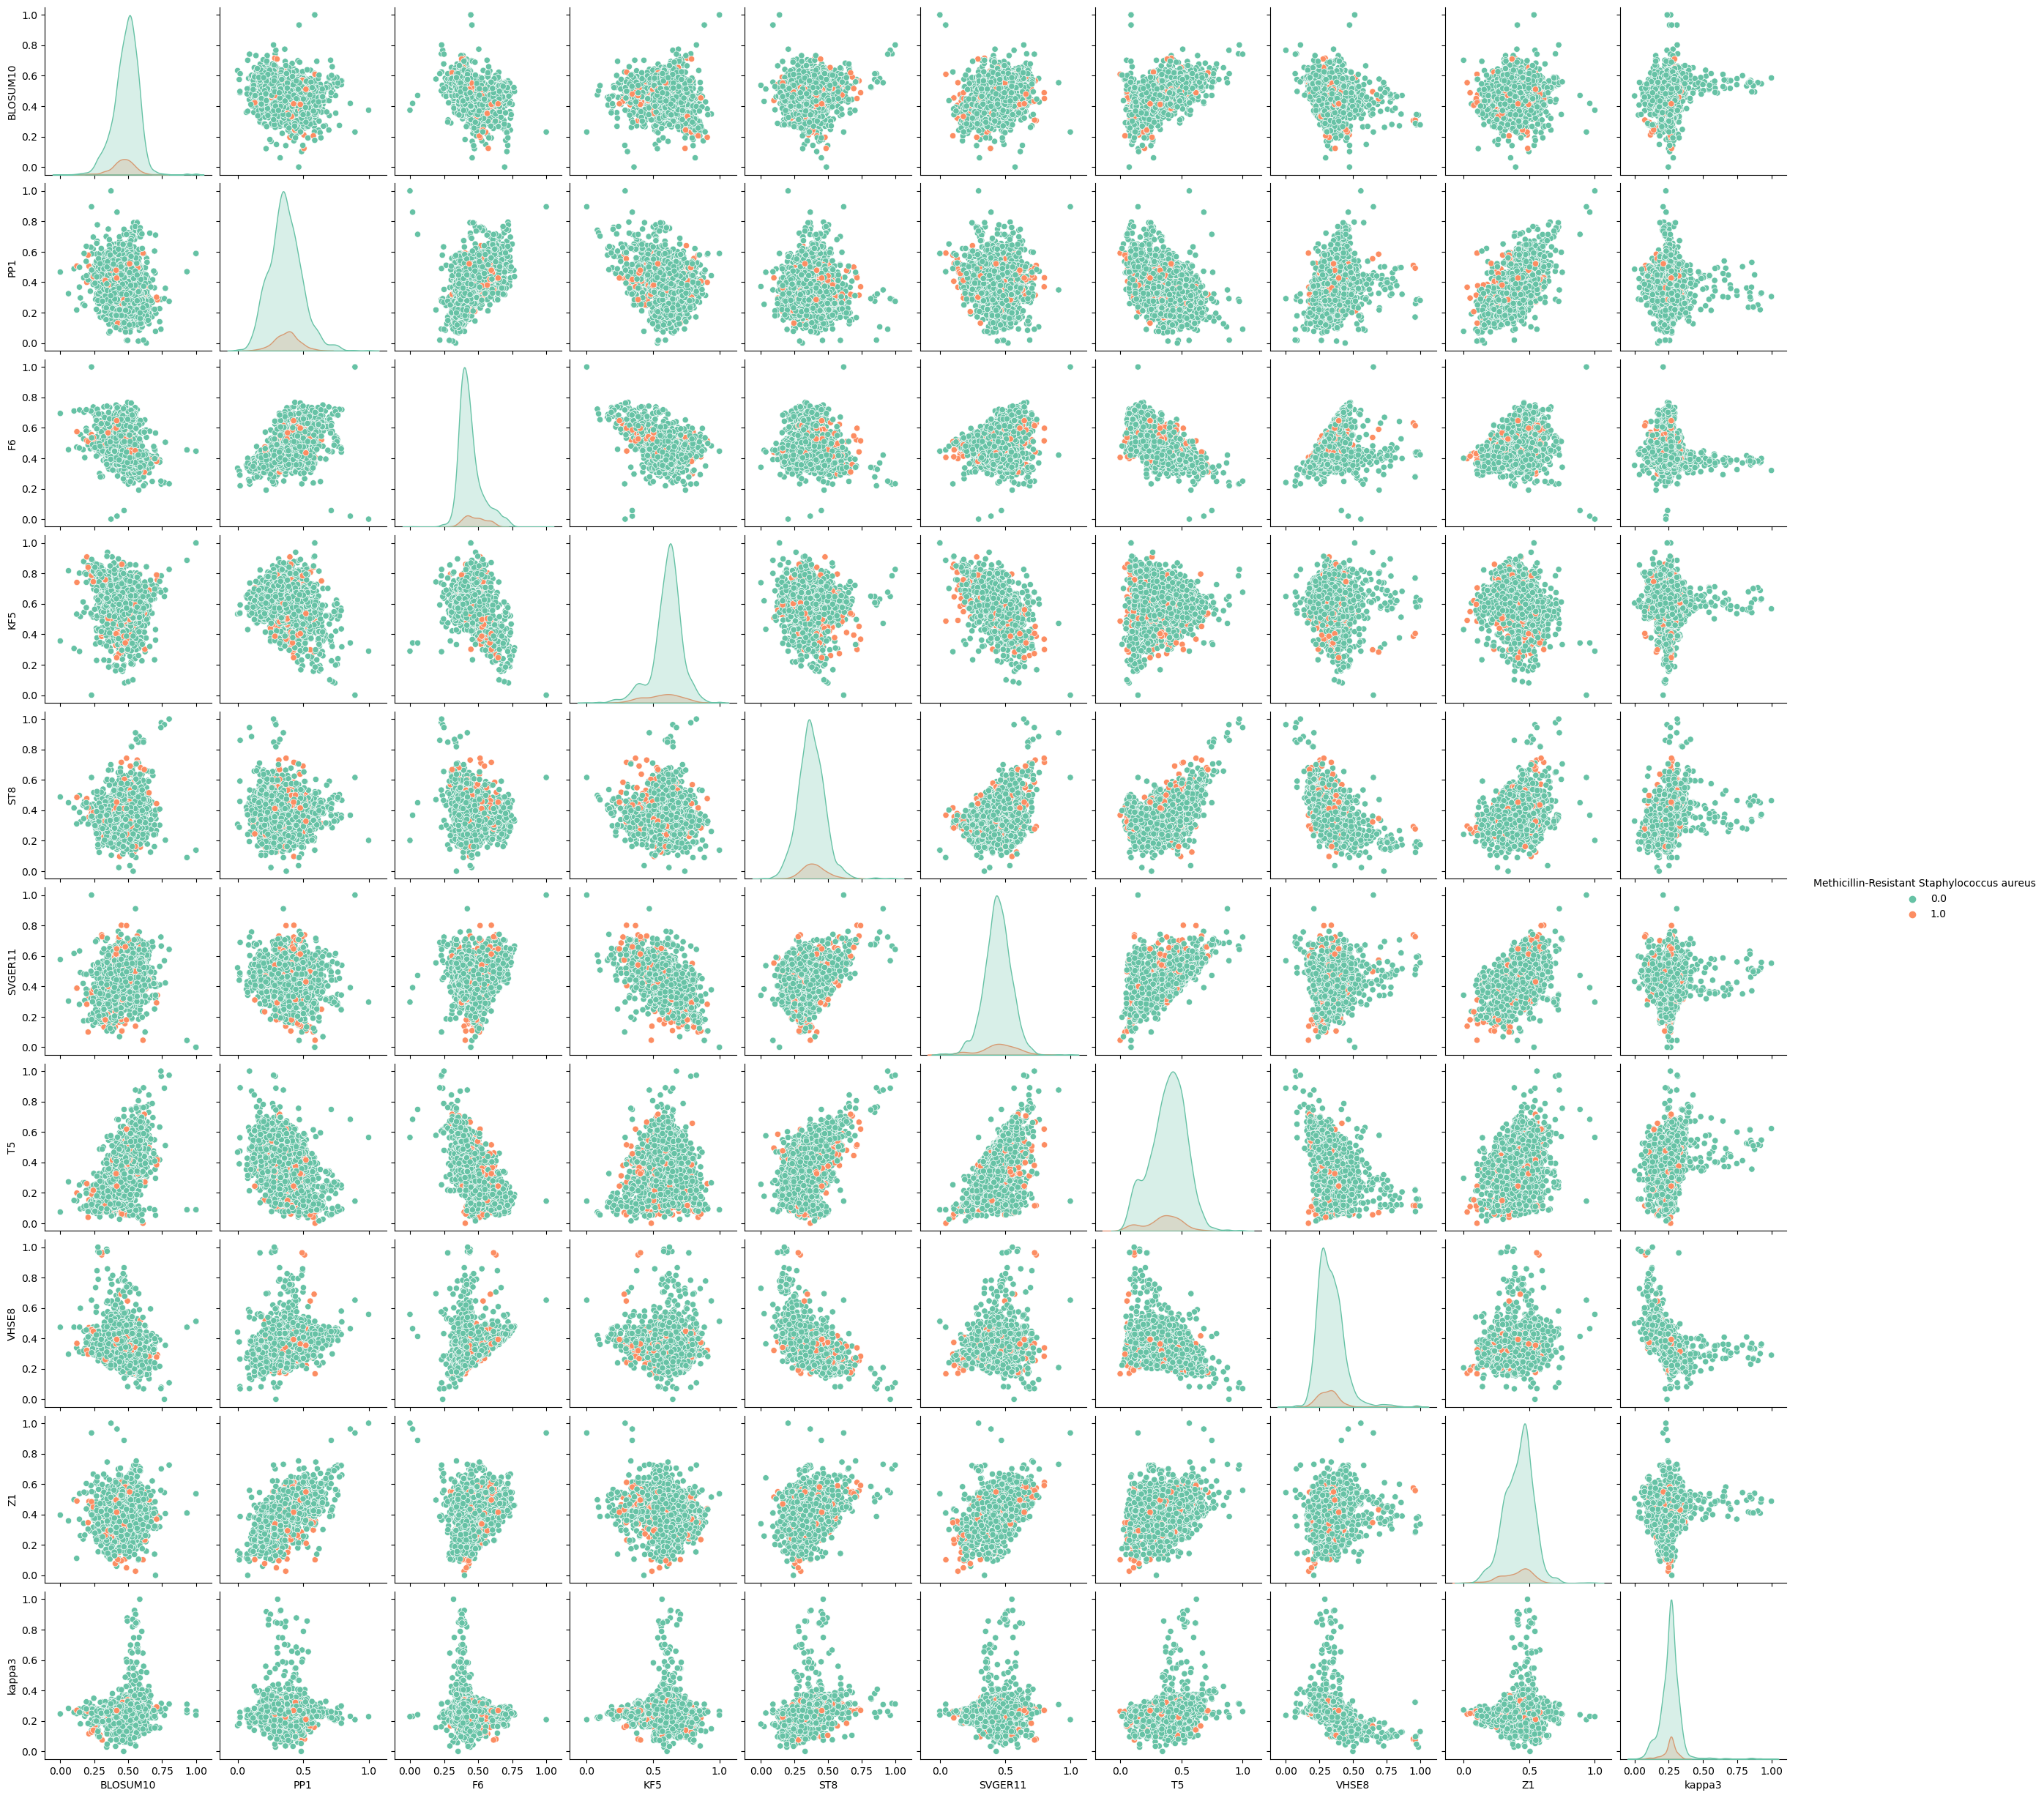

In [12]:
pl=sns.pairplot(df3, hue='Methicillin-Resistant Staphylococcus aureus', palette='Set2')
plt.show()

# Correlation

Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable.
It gives us the idea about the degree of the relationship of the two variables. 

Highly correlated features refer to variables that have a strong linear relationship with each other. When two or more variables are highly correlated, they carry almost the same information, making it redundant to include all of them in a model. This can lead to a problem known as multicollinearity where it becomes difficult to determine the independent effect of each variable on the target variable. 

In [7]:
#Let's check for highly correlated features.
cor_matrix=df.corr().abs()
cor_matrix

Sequence_Length  \
Sequence_Length                                     1.000000   
Methicillin-Resistant Staphylococcus aureus         0.089768   
exactmw                                             0.956843   
amw                                                 0.839824   
lipinskiHBA                                         0.941790   
...                                                      ...   
Z1                                                  0.396532   
Z2                                                  0.244434   
Z3                                                  0.413318   
Z4                                                  0.328043   
Z5                                                  0.036923   

                                             Methicillin-Resistant Staphylococcus aureus  \
Sequence_Length                                                                 0.089768   
Methicillin-Resistant Staphylococcus aureus                                     1.000000   
exactmw                                                                         0.083009   
amw                                                                             0.083672   
lipinskiHBA                                                                     0.083282   
...                                                                                  ...   
Z1                                                                              0.051383   
Z2                                                                              0.101202   
Z3                                                                              0.098841   
Z4                                                                              0.155784   
Z5                                                                              0.108687   

                                              exactmw       amw  lipinskiHBA  \
Sequence_Length                              0.956843  0.839824     0.941790   
Methicillin-Resistant Staphylococcus aureus  0.083009  0.083672     0.083282   
exactmw                                      1.000000  0.882855     0.994186   
amw                                          0.882855  1.000000     0.906204   
lipinskiHBA                                  0.994186  0.906204     1.000000   
...                                               ...       ...          ...   
Z1                                           0.355540  0.148728     0.320492   
Z2                                           0.177644  0.220399     0.173582   
Z3                                           0.349596  0.285580     0.322107   
Z4                                           0.282292  0.227861     0.273868   
Z5                                           0.042032  0.067226     0.006210   

                                             lipinskiHBD  NumRotatableBonds  \
Sequence_Length                                 0.905487           0.916252   
Methicillin-Resistant Staphylococcus aureus     0.079276           0.073311   
exactmw                                         0.935302           0.964821   
amw                                             0.953837           0.783997   
lipinskiHBA                                     0.943445           0.953904   
...                                                  ...                ...   
Z1                                              0.239502           0.411580   
Z2                                              0.193469           0.175165   
Z3                                              0.295915           0.294381   
Z4                                              0.255928           0.294539   
Z5                                              0.003078           0.088103   

                                               NumHBD    NumHBA  \
Sequence_Length                              0.640569  0.893784   
Methicillin-Resistant Staphylococcus aureus  0.065742  0.064344   
exactmw                                      0.671228  0.954

<AxesSubplot:>

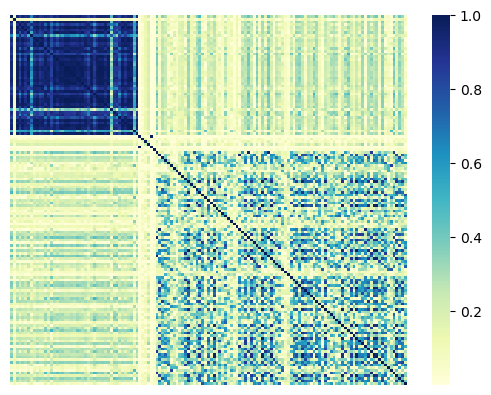

In [5]:
#Visualizing correlation matrices
sns.heatmap(cor_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)

So, you can see that there are highly correlated descriptors. They must be removed.

In [14]:
str(cor_matrix.columns.values.tolist())

"['Sequence_Length', 'Methicillin-Resistant Staphylococcus aureus', 'exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms', 'NumBridgeheadAtoms', 'NumAtomStereoCenters', 'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n', 'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2', 'kappa3', 'Phi', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'MSWHIM3', 'E1', 'E2', 'E3', 'E4',

In [6]:
col=['Sequence_Length', 'Methicillin-Resistant Staphylococcus aureus', 'exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms', 'NumBridgeheadAtoms', 'NumAtomStereoCenters', 'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n', 'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2', 'kappa3', 'Phi', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'MSWHIM3', 'E1', 'E2', 'E3', 'E4', 'E5', 'PD1', 'PD2', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV1', 'SV2', 'SV3', 'SV4', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11', 'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5']

In [7]:
#Let's count the number of values greater than 0.6 in the correlation matrix.
count = np.count_nonzero(cor_matrix > 0.6, axis=1)
ar = pd.DataFrame(count, columns = ['Count'])
ar['Col']=''
i=0
for name in col:
    ar.at [i, 'Col'] = name
    i=i+1

In [8]:
ar.sort_values (by = ['Count'], ascending = [ False])

Count                       Col
27     43                      tpsa
5      43               lipinskiHBD
22     43             NumSpiroAtoms
21     43  NumAliphaticHeterocycles
0      42           Sequence_Length
..    ...                       ...
50      1                   BLOSUM6
58      1                        F1
97      1                       ST2
59      1                        F2
48      1                   BLOSUM4

[139 rows x 2 columns]

array([[<AxesSubplot:title={'center':'Count'}>]], dtype=object)

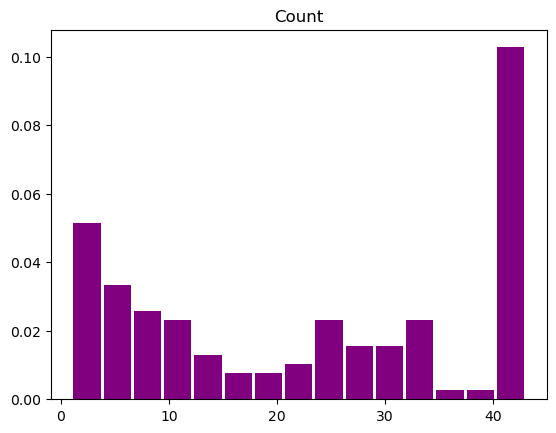

In [9]:
ar.hist(column='Count', bins=15, density=True, grid= False , rwidth= .9 , color='purple')

In [9]:
#Keep columns with low correlation:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
df.drop(to_drop, axis=1, inplace=True)

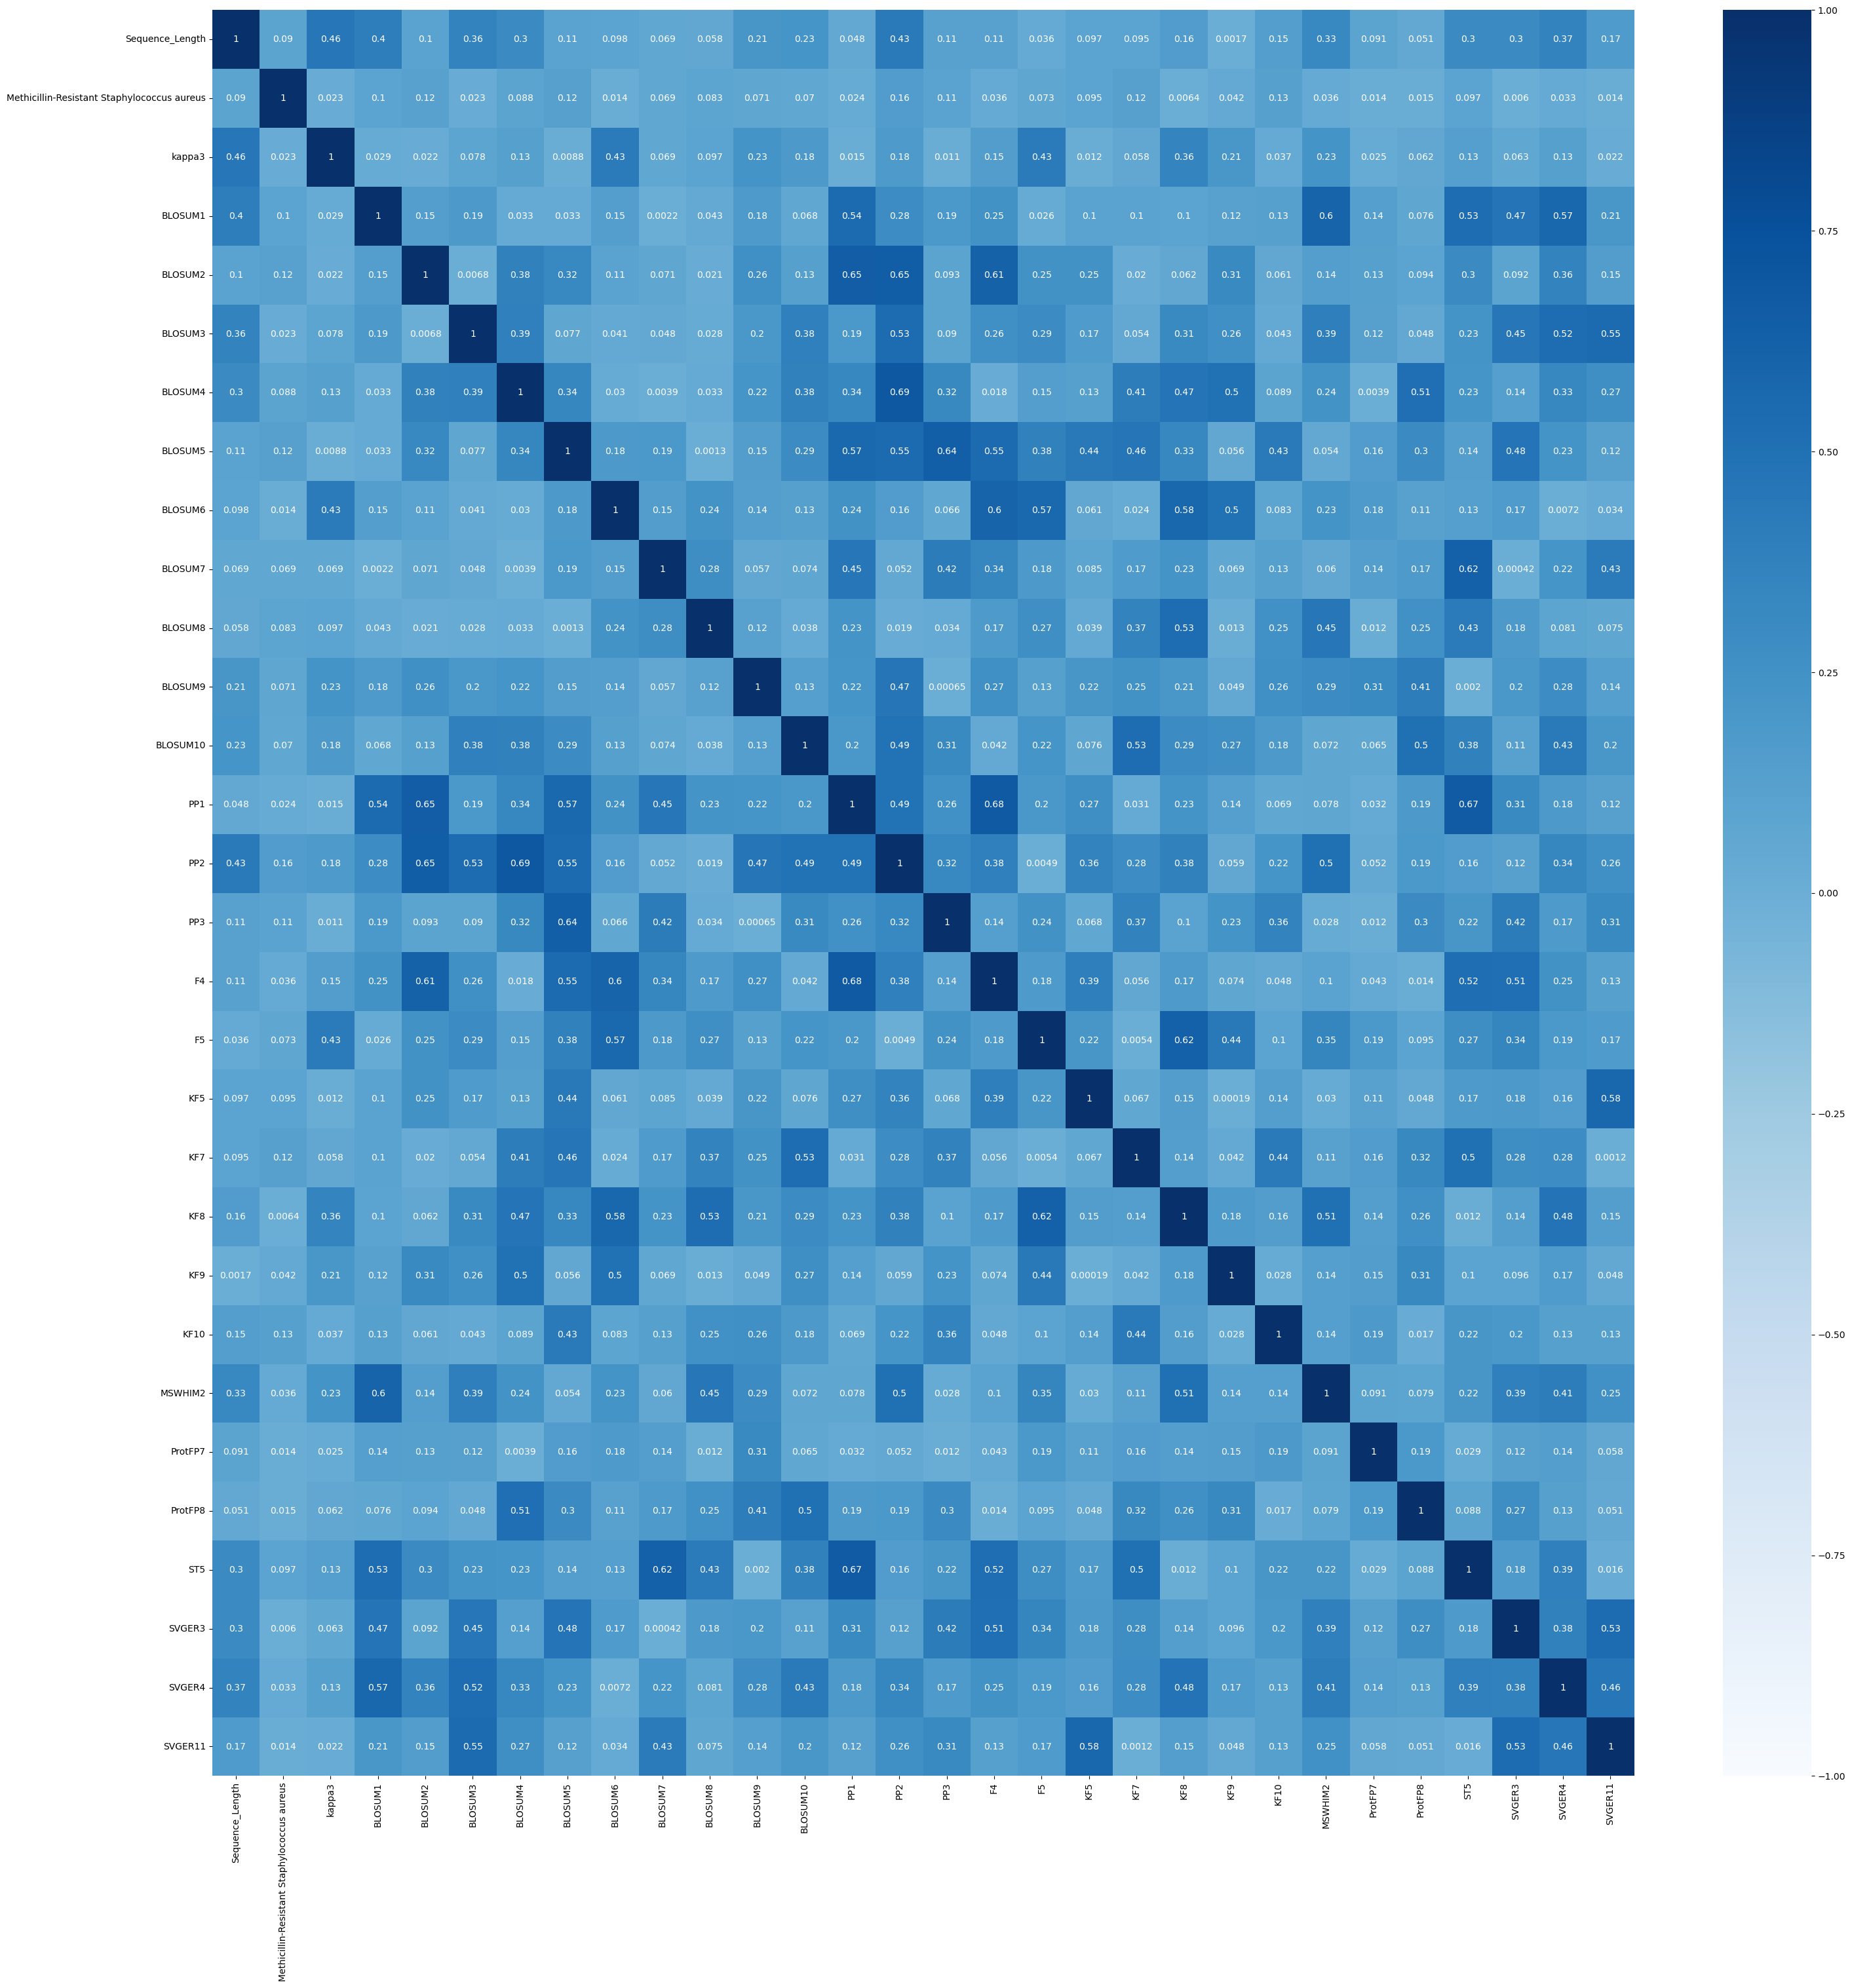

In [10]:
cor_matrix=df.corr().abs()
ax, fig = plt.subplots(figsize=(35, 35))
sns.heatmap(cor_matrix, vmin=-1, cmap=plt.cm.Blues, annot=True)
plt.show()

In [14]:
str(df.columns.values.tolist())

"['Sequence', 'Sequence_Length', 'Name', 'Activity', 'Target_Organism', 'Linear/Cyclic/Branched', 'Methicillin-Resistant Staphylococcus aureus', 'kappa3', 'MRSA', 'Antibacterial', 'Antifungal', 'Anti-Gram+', 'Anti-Gram-', 'Antiviral', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F4', 'F5', 'KF5', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM2', 'ProtFP7', 'ProtFP8', 'ST5', 'SVGER3', 'SVGER4', 'SVGER11']"

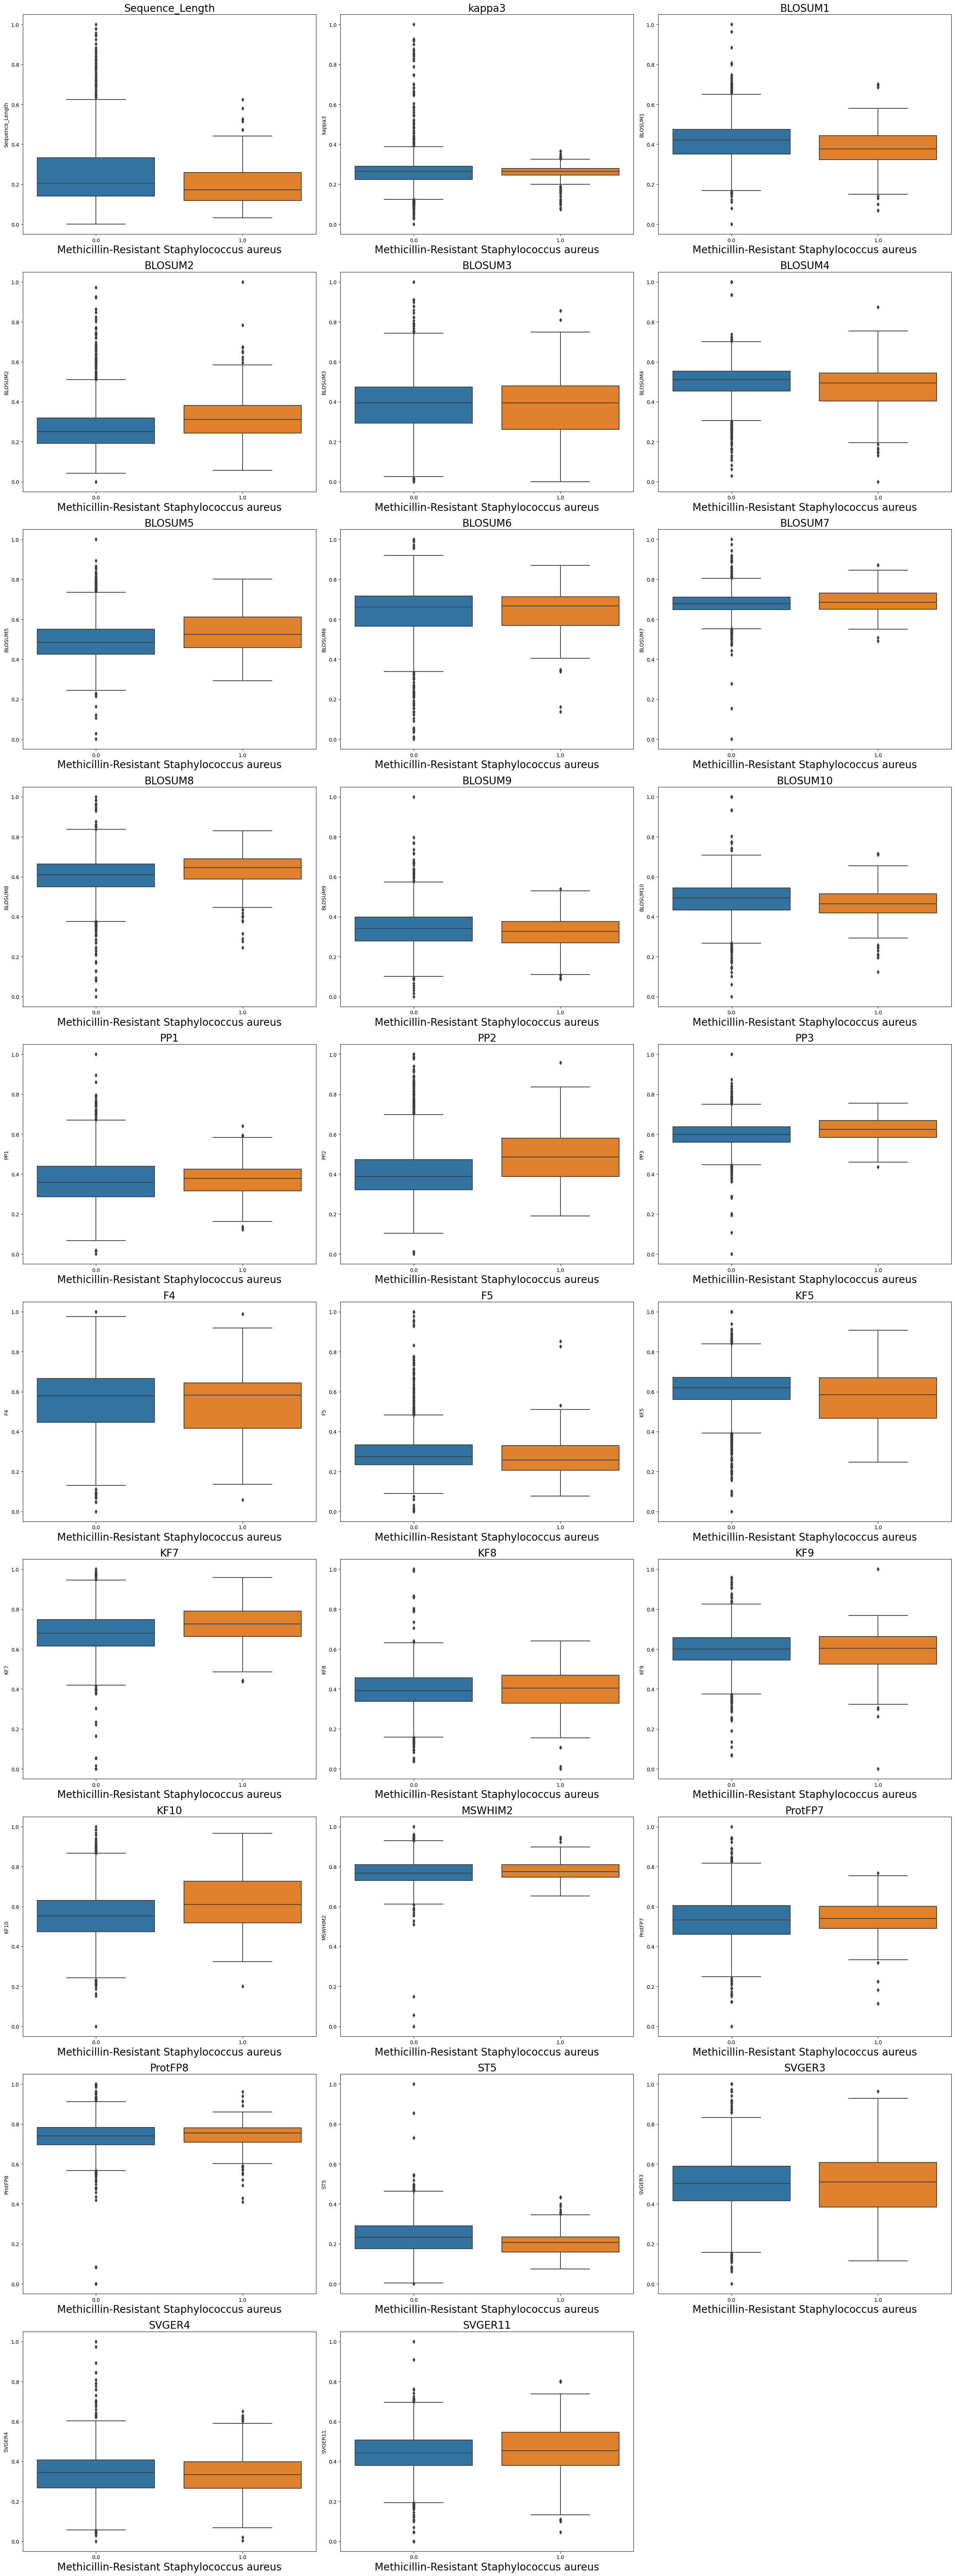

In [25]:
a = 10  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
col=['Sequence_Length', 'kappa3', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F4', 'F5', 'KF5', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM2', 'ProtFP7', 'ProtFP8', 'ST5', 'SVGER3', 'SVGER4', 'SVGER11']
fig = plt.figure(figsize = (26,70))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c), fontsize=20)
    plt.xlabel(i, fontsize=20)
    sns.boxplot(data = df, x = 'Methicillin-Resistant Staphylococcus aureus',y=i)
    c = c + 1

plt.tight_layout()
plt.show()

# Singular Value Decomposition (SVD) - dimensionality reduction algorithm

Why would we want to reduce the number of dimensions? 
In predictive analytics, more columns normally means more time required to build models and score data. 
Since we still have a lot of columns, we should use the dimensionality reduction technique.

In [11]:
df1=df.drop(columns = ['Methicillin-Resistant Staphylococcus aureus'],axis = 1)

#define predictor and response variables
X = df1
Y = df['Methicillin-Resistant Staphylococcus aureus']

#Fit the model
model = TruncatedSVD(n_components = 28)
model.fit(X, Y)

y = np.cumsum(model.explained_variance_ratio_)
xi = np.arange(1, y.shape[0]+1, step=1)

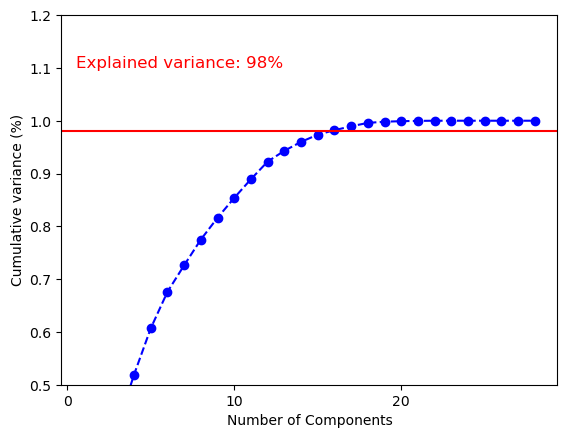

In [12]:
# plot results
plt.ylim(0.5,1.2)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 26, step=10))
plt.ylabel('Cumulative variance (%)')
plt.axhline(y=0.98, color='r', linestyle='-')
plt.text(0.5, 1.1, 'Explained variance: 98%', color = 'red', fontsize=12)
plt.show()

In [13]:
#Look at the graph, we'd better set the number of components to 18.
svd = TruncatedSVD(n_components = 18)
X = svd.fit_transform(X)

In [14]:
df_pc = pd.DataFrame(data = X, columns = [f'SV{i}' for i in range(1,19)])

In [15]:
D=df['Methicillin-Resistant Staphylococcus aureus']
D=D.to_frame()
df_pc=D.join(df_pc)

In [16]:
df_pc

Methicillin-Resistant Staphylococcus aureus       SV1       SV2  \
0                                             0.0  2.733380 -0.364120   
1                                             0.0  2.835520 -0.159659   
2                                             0.0  2.659776  0.990159   
3                                             0.0  2.840580 -0.290973   
4                                             0.0  2.728400 -0.045828   
...                                           ...       ...       ...   
2921                                          0.0  2.692207 -0.052180   
2922                                          0.0  2.610503 -0.100576   
2923                                          0.0  2.689955  0.072344   
2924                                          0.0  2.691461 -0.129835   
2925                                          0.0  2.699517 -0.042754   

           SV3       SV4       SV5       SV6       SV7       SV8       SV9  \
0    -0.265961 -0.035247  0.066487 -0.006549 -0.082119 -0.038463 -0.004160   
1     0.471742  0.039561 -0.214952  0.117808 -0.028153  0.213016  0.027742   
2    -0.128712 -0.199784 -0.138860  0.185844 -0.091939 -0.022775  0.218187   
3     0.267694 -0.223620 -0.066643 -0.033073 -0.089887  0.183236  0.023673   
4    -0.190812 -0.106590 -0.055497  0.017814 -0.031391  0.225676 -0.098687   
...        ...       ...       ...       ...       ...       ...       ...   
2921  0.072328  0.411088 -0.175861  0.059301 -0.483660 -0.169593 -0.150511   
2922 -0.203279  0.020777 -0.142896 -0.106292 -0.006152  0.016845 -0.008292   
2923  0.189485  0.059517  0.313461  0.132792  0.085366 -0.079475  0.094747   
2924 -0.068305 -0.026556 -0.050896 -0.028771  0.026435  0.115439 -0.098967   
2925  0.199987  0.114715 -0.008914  0.099780 -0.189899  0.115792 -0.120785   

          SV10      SV11      SV12      SV13      SV14      SV15      SV16  \
0     0.100501  0.068225  0.133448  0.051800 -0.097224  0.013136  0.052166   
1    -0.056728  0.038046  0.060582 -0.047422 -0.043046 -0.078820  0.019782   
2    -0.013748 -0.008070  0.118991  0.067004 -0.012808 -0.019610  0.032831   
3    -0.008261  0.112738  0.084860  0.032523 -0.049538 -0.043224  0.027944   
4    -0.134217 -0.301475  0.308932  0.036140  0.272766 -0.122372 -0.083262   
...        ...       ...       ...       ...       ...       ...       ...   
2921  0.257596 -0.000545 -0.077901 -0.092618  0.135372  0.121152 -0.296877   
2922  0.077072 -0.149012 -0.063310 -0.010219 -0.186263 -0.127953  0.006981   
2923 -0.115395  0.034151 -0.071409 -0.065779  0.038346  0.036520  0.062509   
2924  0.117897  0.082628  0.000897  0.120985  0.251451  0.028290  0.005377   
2925 -0.147061 -0.007507 -0.004029  0.087692  0.110216 -0.094990 -0.066302   

          SV17      SV18  
0    -0.015889 -0.059217  
1    -0.004110 -0.075610  
2     0.017100  0.027714  
3    -0.028161 -0.027668  
4    -0.020266  0.066189  
...        ...       ...  
2921 -0.065527 -0.187193  
2922  0.062279  0.121197  
2923 -0.091400  0.035853  
2924  0.050988  0.127274  
2925  0.004392  0.003992  

[2926 rows x 19 columns]

# SVC (Support Vector Classifier)
It is a machine learning technique used for classification, regression and outlier detection.

In [17]:
#In my data, MRCA-peptides and non-MRCA are not evenly spaced in the dataframe. Therefore, we shaffle the samples:
shuffled=df_pc.sample(frac=1)

In [18]:
pos=shuffled.loc[df_pc['Methicillin-Resistant Staphylococcus aureus'] == 1]
neg=shuffled.loc[df_pc['Methicillin-Resistant Staphylococcus aureus'] == 0].head(256)
DF=pd.concat([pos,neg],sort=False, axis=0)

In [19]:
DF=DF.sample(frac=1)
DF

Methicillin-Resistant Staphylococcus aureus       SV1       SV2  \
2367                                          1.0  2.765377  0.025995   
2106                                          0.0  2.786304 -0.243973   
792                                           1.0  2.747953  0.538004   
1464                                          0.0  2.859716 -0.308954   
902                                           1.0  2.737630  0.198105   
...                                           ...       ...       ...   
2516                                          0.0  2.615455  0.143148   
833                                           1.0  2.717393  0.526537   
2591                                          0.0  2.699497  0.705186   
842                                           0.0  2.883493  0.094969   
1666                                          1.0  2.727993 -0.112607   

           SV3       SV4       SV5       SV6       SV7       SV8       SV9  \
2367 -0.701662 -0.123399  0.075005 -0.261470  0.139980  0.010296  0.105253   
2106 -0.531805 -0.193360  0.029930 -0.079106  0.178643  0.051505  0.011889   
792   0.096270 -0.379614  0.066937  0.197381  0.117174 -0.035551 -0.060733   
1464  0.074325 -0.280921 -0.085243  0.012287 -0.033872  0.038319  0.104046   
902  -0.244074 -0.021433 -0.132429  0.057121 -0.098353 -0.087551 -0.059442   
...        ...       ...       ...       ...       ...       ...       ...   
2516  0.149258  0.048381  0.232560  0.247186  0.061663 -0.069630 -0.027788   
833   0.077287 -0.277431  0.075652  0.274453  0.070018 -0.058026 -0.025008   
2591 -0.316893 -0.060441 -0.308694  0.027764 -0.106842 -0.040470  0.218380   
842   0.522624 -0.243553 -0.108552 -0.167086 -0.225805 -0.011688 -0.166059   
1666  0.106658 -0.030173 -0.001417 -0.074309  0.039473 -0.058622 -0.022362   

          SV10      SV11      SV12      SV13      SV14      SV15      SV16  \
2367  0.093290  0.040301 -0.174151  0.044791 -0.000991  0.009759  0.007472   
2106 -0.029745 -0.061081 -0.022768  0.065658  0.042820 -0.026696 -0.027533   
792   0.017651 -0.124369  0.029061  0.005885  0.011150  0.046095  0.011810   
1464  0.028501  0.135975 -0.138391  0.073553  0.122545 -0.058969 -0.070514   
902  -0.049359  0.047963  0.170148 -0.037814 -0.022377  0.051213  0.073173   
...        ...       ...       ...       ...       ...       ...       ...   
2516 -0.021893 -0.126666 -0.141825  0.070054 -0.065679  0.090159 -0.064952   
833   0.062878 -0.132054  0.127976 -0.013973  0.049243  0.097896  0.007874   
2591 -0.042691  0.105240 -0.048129 -0.036027 -0.007343  0.023338  0.035226   
842  -0.105822  0.209463 -0.079506 -0.104690  0.051020 -0.181937  0.035996   
1666  0.121430 -0.023568 -0.082504  0.067426  0.042578 -0.030153  0.007610   

          SV17      SV18  
2367  0.003127 -0.025427  
2106 -0.007879 -0.014487  
792   0.024173 -0.034510  
1464 -0.025564 -0.012542  
902  -0.017998 -0.059245  
...        ...       ...  
2516 -0.066926 -0.043523  
833   0.000668 -0.058200  
2591  0.004921  0.026515  
842   0.033774  0.050464  
1666  0.027667 -0.010463  

[512 rows x 19 columns]

In [20]:
X = DF.drop('Methicillin-Resistant Staphylococcus aureus', axis = 1) # Dropping our target column
y = DF['Methicillin-Resistant Staphylococcus aureus'] # Extracting the GOx REA column
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42) # Splitting our data into test and training set, where 80% of data goes to training and 20% to test (test_size). RNG seed 42 is given as argument to ensure reproducibility.
scaler = StandardScaler() #Instantiating scaler to prepare our final data to use during model development
X_train = scaler.fit_transform(X_train_raw) # fitting the scaler and transforming our train data using .fit_transform
X_test = scaler.transform(X_test_raw) #Using .transform to scale our test data with the settings obtained from fitting the training data 

# Selection of parameters:

In [33]:
params = {'C': [0.01, 0.1, 0.5, 1, 10, 20], 
              'gamma': [1, 0.75, 0.5], 
              'kernel': ['poly','sigmoid','rbf']} 
clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


In [21]:
#Model training with the best parameters:
svc = SVC(kernel="rbf",degree=3, gamma=0.5, C=10)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Confusion matrix
A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category.

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        60
         1.0       0.86      0.72      0.78        43

    accuracy                           0.83       103
   macro avg       0.84      0.82      0.83       103
weighted avg       0.84      0.83      0.83       103



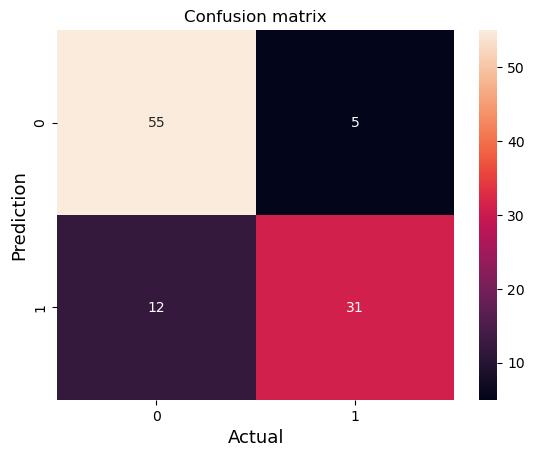

In [24]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')# fmt='d' formats the numbers as digits, which means integers
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
print(classification_report(y_test,y_pred))